# Introduction to Matplotlib

Matplotlib is a multiplatform data visualization library built on NumPy arrays. 

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

For all Matplotlib plots, we start by creating a figure and an axes. In their simplest form, they can be created as follows:

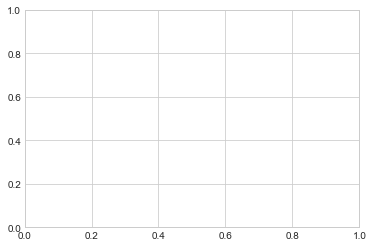

In [3]:
fig = plt.figure()
ax = plt.axes()

Let's create 10, 50, and 1000 points between 0 and 10, and plot the sin() function:

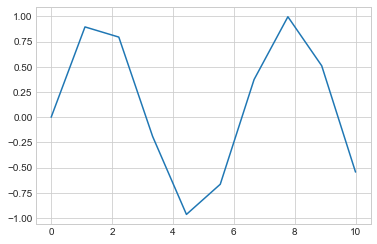

In [4]:
fig = plt.figure()
ax = plt.axes()
# Generating 10 values
x = np.linspace(0,10,10)
ax.plot(x,np.sin(x));

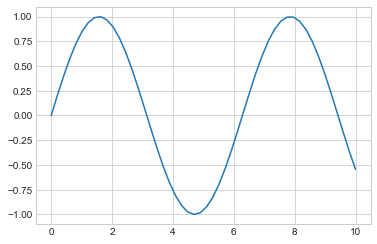

In [5]:
fig = plt.figure()
ax = plt.axes()
# Generating 50 values
x = np.linspace(0,10,50)
ax.plot(x,np.sin(x));

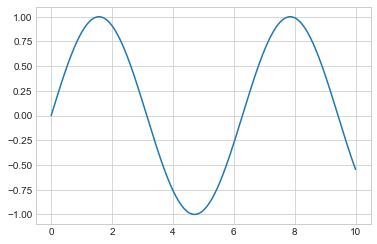

In [6]:
fig = plt.figure()
ax = plt.axes()
# Generating 1000 values
x = np.linspace(0,10,1000)
ax.plot(x,np.sin(x));

If we can to create a single figure with multiple lines, we can call the plot funcion multiple times:

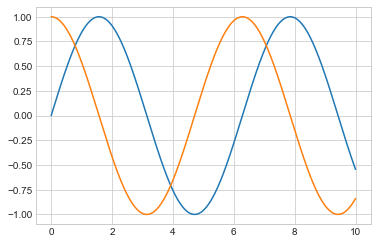

In [7]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0,10,1000)
ax.plot(x,np.sin(x))
ax.plot(x,np.cos(x));

A legend could clarify the graphs:

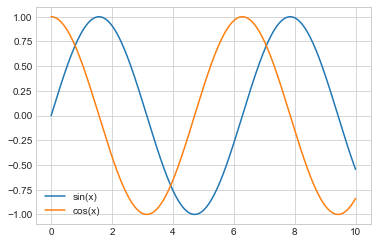

In [8]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0,10,1000)
ax.plot(x,np.sin(x), label='sin(x)')
ax.plot(x,np.cos(x), label='cos(x)')
plt.legend();

You can specify different colors and styles:

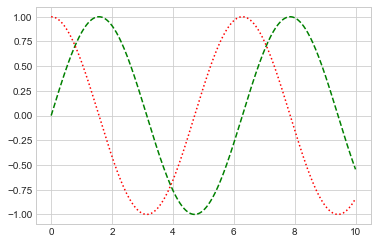

In [9]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0,10,1000)
ax.plot(x,np.sin(x), color='green', linestyle='dashed')
ax.plot(x,np.cos(x), color='red', linestyle='dotted');

Colors and styles can be combined into a single nonkeyword argument:
- plt.plot(x, `'-g'`)  -> `solid green`
- plt.plot(x,`'--c'`)  -> `dashed cyan`
- plt.plot(x,`'-.k'`)  -> `dashdot black`
- plt.plot(x, `':r'`)  -> `dotted red`

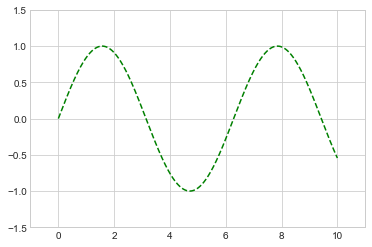

In [10]:
# Adjusting the plot: axes limits
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0,10,1000)
ax.plot(x,np.sin(x),'--g')
plt.xlim(-1,11)
plt.ylim(-1.5,1.5);

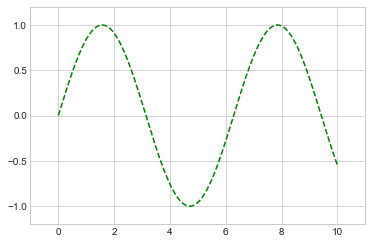

In [11]:
# Combining plt.xlim and plt.ylim into plt.axis
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0,10,1000)
ax.plot(x,np.sin(x), '--g')
plt.axis([-1,11,-1.2,1.2]);

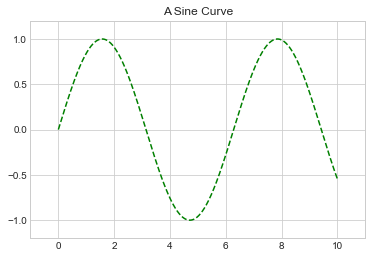

In [12]:
# Adding a title
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0,10,1000)
ax.plot(x,np.sin(x), '--g')
plt.axis([-1,11,-1.2,1.2])
plt.title('A Sine Curve');

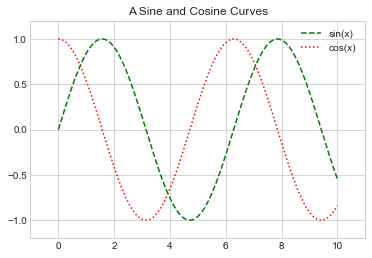

In [13]:
# Adding a legend
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0,10,1000)
plt.title('A Sine and Cosine Curves')
ax.plot(x,np.sin(x), '--g', label='sin(x)')
ax.plot(x,np.cos(x), ':r', label='cos(x)')
plt.legend()
plt.axis([-1,11,-1.2,1.2]);

## Visualizing errors

For any scientific measurement, accurate accounting for errors is very important. 

Basic Errorbars 

In [14]:
# Generating data: 
# x: 50 values evenly spaced between 0 and 10
x = np.linspace(0, 10, 50)
print('First 5 values of x =',x[:5])

First 5 values of x = [0.         0.20408163 0.40816327 0.6122449  0.81632653]


In [15]:
dy = 0.6
# y: sin() function + random error
y = np.sin(x) + dy * np.random.rand(50)
print('First 5 values of y =',y[:5])

First 5 values of y = [0.25245082 0.35224816 0.58711582 0.92182125 1.28544218]


errbar() plots `y` versus `x` as lines and/or markers with attached errorbars.

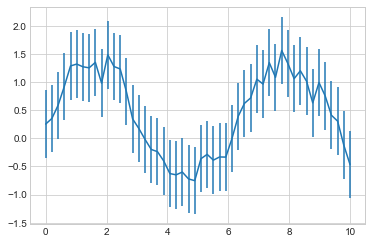

In [16]:
plt.errorbar(x, y, yerr=dy);

The fmt is a format code controlling the appearance of lines and points.

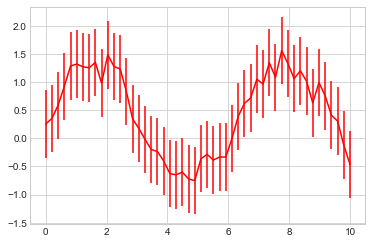

In [17]:
plt.errorbar(x, y, yerr=dy, fmt='r');

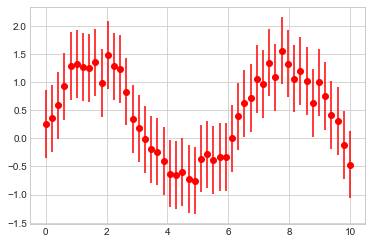

In [18]:
plt.errorbar(x, y, yerr=dy, fmt='ro');

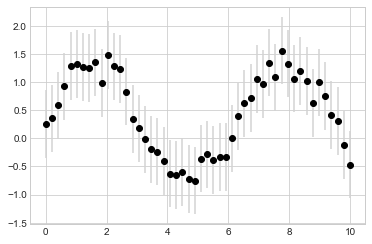

In [19]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray');

## Histograms and densities

A simple histogram can be a great first step in understanding a numerical dataset.

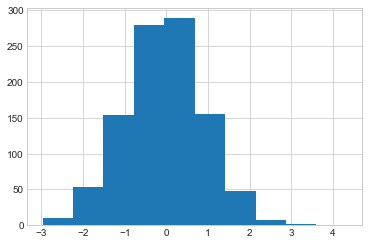

In [20]:
data = np.random.randn(1000)
plt.hist(data);

The `bins` parameter tells you the number of bins (intervals) that your data will be divided into. You can specify it as an integer or as a list of bin edges.

Let's choose bins=30

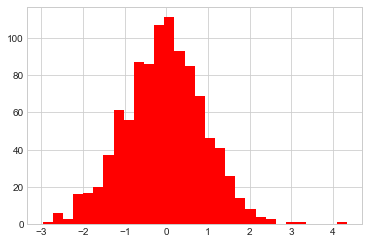

In [21]:
plt.hist(data, bins=30, color='red');

The `alpha` parameter is a measure of opacity.

Let's choose alpha=0.5

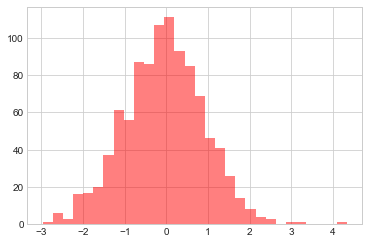

In [22]:
plt.hist(data, bins=30, color='red', alpha=0.5);

If 'density=True', the values are normalized. The shape of the histogram is the same, the scale of the y-axis changes.

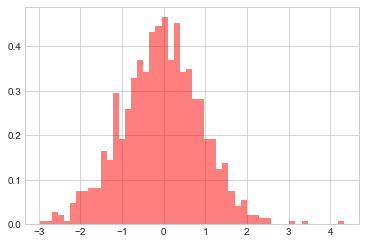

In [23]:
plt.hist(data, bins=50, color='red', density=True, alpha=0.5);

### Multiple histograms

In [24]:
# Generating 1000 different values for 3 variables
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

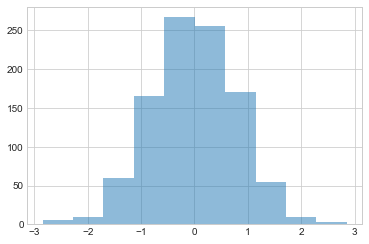

In [25]:
plt.hist(x1, alpha=0.5);

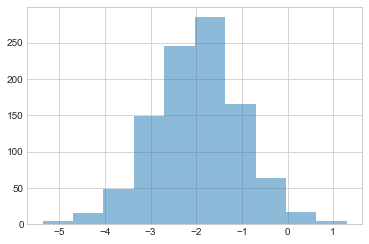

In [26]:
plt.hist(x2, alpha=0.5);

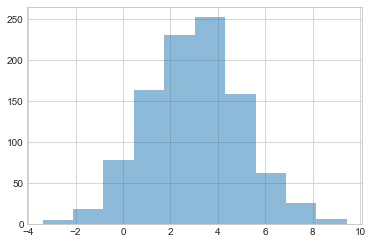

In [27]:
plt.hist(x3, alpha=0.5);

Defining the common parameters as a dictionary:

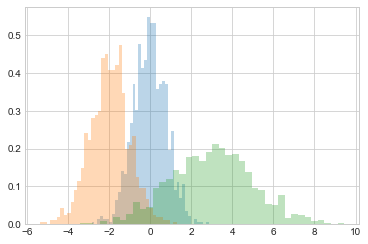

In [28]:
kwargs = dict(alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

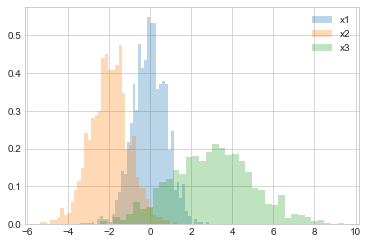

In [29]:
kwargs = dict(alpha=0.3, density=True, bins=40)
plt.hist(x1, **kwargs, label='x1')
plt.hist(x2, **kwargs, label='x2')
plt.hist(x3, **kwargs, label='x3')
plt.legend();

### Two dimensional histograms

We can create histograms in two dimensions by dividing points among two-dimensional bins.

Generating data with multivariate normal distribution:

In [30]:
mean = [0, 0]
cov = [[1, 1],[1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

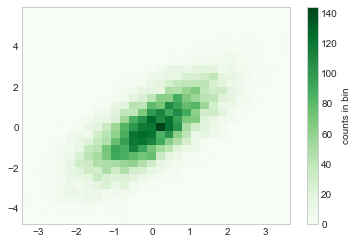

In [31]:
plt.hist2d(x, y, bins=30, cmap='Greens')
cb = plt.colorbar()
cb.set_label('counts in bin');

Hexbins are a simple way of grouping two sets of numeric values into hexagonal bins. 

The hexbin() function is used to make a 2D hexagonal binning plot of points x, y. 

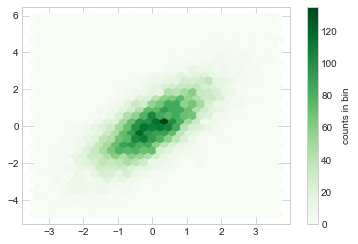

In [32]:
plt.hexbin(x, y, gridsize=30, cmap='Greens')
cb = plt.colorbar()
cb.set_label('counts in bin');

Changing colors:

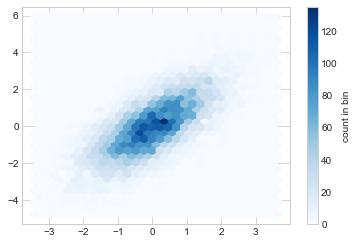

In [33]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin');

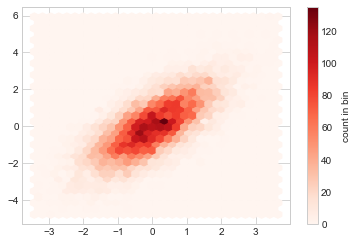

In [34]:
plt.hexbin(x, y, gridsize=30, cmap='Reds')
cb = plt.colorbar(label='count in bin');